In this notebook I would like to share how to process the work with text to build topics. To make it more attractive - apply NLP to the Stock Descriptions.

We will load and build the models with cool 3d visualization.

I encourage you to clone this notebook and play with every parameter to fine tune the result as your sticky mind would like.

Befoure processing the data - run these command to load the stock information. (No SMS and registratoin neede)

That script should create the diretories with of ditories with stock description.

These files has basic company imformation like, company name, description, what exchanges they are places, web site etc.

In [1]:
# around 10 minutes
!python loader-company.py

AA 200
AAAU 200
AABA 200
AAC 200
AADR 200
AAL 200
AAMC 200
AAME 200
AAN 200
AAOI 200
AAON 200
AAP 200
AAPL 200
AAT 200
AAU 200
AAWW 200
AAXJ 200
AAXN 200


In [2]:
# work with file system
import glob

# paser the json text into dict
import json

companies = [json.load(open(filename,'r')) for filename in glob.iglob('company/**/*.json', recursive=True)]

let's put companies to Data Frame

In [3]:
import pandas as pd
df = pd.DataFrame(companies)
df.head()

,CEO,companyName,description,exchange,industry,issueType,sector,symbol,tags,website
0,Yiding Sun,RISE Education Cayman Ltd,RISE Education Cayman Ltd through its subsidia...,NASDAQ Global Market,Education,cs,Consumer Defensive,REDU,"[Consumer Defensive, Education & Training Serv...",http://www.risecenter.com
1,,SPDR DJ Wilshire Intl Real Estate,The investment seeks to provide investment res...,NYSE Arca,,et,,RWX,[],http://www.spdrs.com
2,Kelly Hoffman,Ring Energy Inc.,Ring Energy Inc is a Midland-based exploration...,NYSE American,Oil & Gas - E&P,cs,Energy,REI,"[Energy, Oil & Gas E&P, Oil & Gas - E&P]",http://www.ringenergy.com
3,Rajendra Dinkar Ketkar,Arcadia Biosciences Inc.,Arcadia Biosciences Inc is an agricultural bio...,NASDAQ Capital Market,Agriculture,cs,Basic Materials,RKDA,"[Basic Materials, Agricultural Inputs, Agricul...",http://www.arcadiabio.com
4,,Regalwood Global Energy Ltd. Units,Regalwood Global Energy Ltd is a newly organiz...,New York Stock Exchange,Conglomerates,su,Industrials,RWGE=,"[Industrials, Conglomerates]",https://www.carlyle.com


Fill N/A (empty items) in DataFrame with empty string

In [4]:
df.fillna('', inplace=True)

# NLP

I want to convert descriptions into something meaninfull so we can find companies with same semantics description.

To acheave this goal I will work with NLP libraries to convert text to numbers.

Lemmatizer - is process to convert works into thier simple form and get their pard of speac

In [5]:
# Lemamatiza
from nltk.stem import WordNetLemmatizer
import gensim
lemmatizer = WordNetLemmatizer()

Stop words like - be, is, the are need to be removed from sentense bacause they do not have any value of meaning and they would influence on result in bad way.

In [6]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [7]:
print(', '.join(stopWords))

about, these, his, i, other, its, by, where, ve, on, who, there, weren't, this, over, am, most, my, own, when, wouldn't, below, wouldn, of, off, he, after, s, does, mustn, nor, the, such, too, down, o, them, in, ain, is, with, no, ll, you're, each, or, further, a, hasn, do, it's, all, mightn't, doesn't, here, were, against, out, their, you, under, why, into, some, only, from, to, wasn't, for, any, didn't, been, how, haven't, not, yours, she, couldn, isn, before, she's, yourselves, doesn, our, while, itself, through, very, don't, d, doing, at, themselves, then, same, wasn, couldn't, which, until, won't, they, was, needn't, ma, once, just, and, up, will, whom, should, did, aren't, won, that'll, than, few, those, you'd, ours, didn, had, himself, should've, hadn, because, herself, now, m, but, t, weren, has, you'll, me, don, what, we, shan, above, that, aren, isn't, haven, shouldn, her, mustn't, hasn't, ourselves, so, him, during, re, can, hadn't, mightn, if, your, hers, it, as, again, be,

In [8]:
import spacy

nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def is_allowed(token):
    return (token.pos_ in allowed_postags) and (token.lemma_ not in stopWords)

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if is_allowed(token)]))
    return texts_out

In [9]:
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['description']))

print(data_words[:1])

[['rise', 'education', 'cayman', 'ltd', 'through', 'its', 'subsidiaries', 'provides', 'junior', 'english', 'language', 'training', 'services', 'in', 'china', 'under', 'rise', 'brand', 'it', 'offers', 'educational', 'programs', 'services', 'products', 'consisting', 'of', 'educational', 'courses', 'and', 'other', 'complementary', 'products']]


In [10]:
%%time
data_lemmatized = lemmatization(data_words)

CPU times: user 2min 53s, sys: 24.5 s, total: 3min 17s
Wall time: 33.3 s


## Original vs Limmatized

In [11]:
print('1.',df.iloc[0]['description'])
print('1.', data_lemmatized[0])
print('--')
print('2.',df.iloc[1]['description'])
print('2.', data_lemmatized[1])
print('--')
print('3.',df.iloc[2]['description'])
print('3.', data_lemmatized[2])

1. RISE Education Cayman Ltd through its subsidiaries provides junior English Language Training services in China under RISE brand. It offers educational programs, services & products, consisting of educational courses, and other complementary products.
1. rise education cayman ltd  subsidiary provide junior english language training service china rise brand offer educational program service product consist educational course complementary product
--
2. The investment seeks to provide investment results, before fees and expenses, correspond generally to the total return performance of the Dow Jones Global ex-U.S. Select Real Estate Securities Indexsm.
 The fund generally invests substantially all, but at least 80%, of its total assets in the securities comprising the index and in depositary receipts based on securities comprising the index. The index is a float-adjusted market capitalization index designed to measure the performance of publicly traded real estate securities in countrie


Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             max_df=.09,                        # do not include vey
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}'  # num chars > 3
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [14]:
# size of the matrix
data_vectorized.shape

(8756, 1573)

In [15]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.8344182915386038 %


Only 1.18% of matrix has infomation... allot of zeros there. but that is the nature of our text

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

This is THE Core of our algorithm. This black-box-machine can build us the Number Topics for given text.
There are many ways to find the optimala number.

I googled that there are 12 major industries https://www.thebalance.com/what-are-the-sectors-and-industries-of-the-sandp-500-3957507

Somethimes company may by involved in many industries, they do sales and cloud computing...

In [17]:
df[(df['symbol'] == 'BABA') | (df['symbol'] == 'REI') | (df['symbol'] == 'GOGL')][['symbol','industry']]

,symbol,industry
2,REI,Oil & Gas - E&P
1336,GOGL,Transportation & Logistics
7380,BABA,Retail - Apparel & Specialty


It would make sense to double the ammount of topics

In [18]:
%%time
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=24,           # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=24, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
CPU times: user 5.82 s, sys: 2.83 s, total: 8.65 s
Wall time: 23.6 s


## Labling

What we have done so far
- Loaded the stocks
- Cleaned the descriptions
- Converted descriptions into Vectors
- Build 24 topics for vectors via LDA model

Now we need to:
- Go throught each Vectors (stock description)
- Feed them into LDA model
- For each vector we will receive it's relation to all 12 topics ( 50% topic1, 10%topic2 ... 0% Topic24 )

In [19]:
lda_output = lda_model.transform(data_vectorized)

... Done!

In [20]:
print(lda_output.shape) # 8,752 Stocks
print(lda_output[:2]) # first 2 stocks

(8756, 24)
[[0.00297619 0.06661693 0.00297619 0.00297619 0.00297619 0.00297619
  0.00297619 0.00297619 0.00297619 0.00297619 0.00297619 0.00297619
  0.00297619 0.00297619 0.00297619 0.00297619 0.53376973 0.00297619
  0.00297619 0.00297619 0.00297619 0.00297619 0.2172619  0.12282763]
 [0.16931062 0.00160256 0.00160256 0.00160256 0.00160256 0.00160256
  0.00160256 0.00160256 0.00160256 0.00160256 0.00160256 0.46052929
  0.00160256 0.00160256 0.00160256 0.13861517 0.00160256 0.00160256
  0.19949364 0.00160256 0.00160256 0.00160256 0.00160256 0.00160256]]


Let's visualize the result as table:

In [21]:
import numpy as np
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = [i for i in df.symbol]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .05 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_style_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_style_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,dominant_topic
REDU,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,0,0,0,0,0,0.22,0.12,16
RWX,0.17,0,0,0,0,0,0,0,0,0,0,0.46,0,0,0,0.14,0,0,0.2,0,0,0,0,0,11
REI,0,0,0,0,0,0,0,0,0,0,0,0,0,0.94,0,0,0,0,0,0,0,0,0,0,13
RKDA,0,0,0.5,0,0,0,0.25,0,0,0,0,0,0,0,0,0.09,0,0,0,0,0,0.09,0,0,2
RWGE=,0,0,0,0,0.08,0,0,0.09,0,0.36,0,0,0,0.32,0,0.09,0,0,0,0,0,0,0,0,9
RSXJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.48,0,0.32,0,0,0.16,0,0,16
RICK,0,0,0,0,0,0,0.09,0.2,0,0,0.09,0,0,0,0,0,0.1,0.11,0,0,0,0,0,0.33,23
RFV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.65,0,0.32,0,0,19
RCON,0,0,0,0.07,0.15,0.07,0.08,0,0,0,0,0,0,0.23,0,0,0.07,0.28,0,0,0,0,0,0,17
RNDB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.18,0,0,0,0,0.73,23


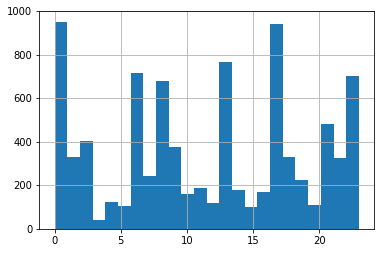

In [22]:
df_document_topic['dominant_topic'].hist(bins=24)

The topic distribution look ok. The spike on 17th topic not that huge.

Yes, you can spend allto of time to make it better and better (not perfect)... not now.

# Visualization

We done with processing the text.

Now let's visualize it with bokeh chart. (2d)


In [23]:
# remove teh last column
df_document_topic.drop(columns="dominant_topic", inplace=True)
df_document_topic.values.shape

(8756, 24)

to put this 12 parameters/dimentions on plot - we need to convert them to 2d/3d.

Fot that porpuse we will use the Dimentionality Reduction model. 
I will t-SNE:

In [24]:
%%time
from sklearn.manifold import TSNE
topics_tsne = TSNE(perplexity=30, n_components=3)
topics_tsne_vectors = topics_tsne.fit_transform(df_document_topic.values)

CPU times: user 14min 3s, sys: 31 s, total: 14min 34s
Wall time: 5min 22s


In [25]:
topics_tsne_vectors[:2]

array([[ -1.0625552,  -7.4641976,  -7.0763793],
       [ -1.287429 ,  -2.773017 , -17.898645 ]], dtype=float32)

Prepare the data for Chart - X, Y, Z

In [26]:
df_topics_tsne_vectors = pd.DataFrame(topics_tsne_vectors,
                            index=pd.Index(df_document_topic.index),
                            columns=[u'x_coord', u'y_coord', u'z_coord'])
df_topics_tsne_vectors['symb'] = df_topics_tsne_vectors.index
df_topics_tsne_vectors.head()

,x_coord,y_coord,z_coord,symb
REDU,-1.062555,-7.464198,-7.076379,REDU
RWX,-1.287429,-2.773017,-17.898645,RWX
REI,-26.674334,-10.842264,4.974646,REI
RKDA,11.457413,-4.861655,-0.286978,RKDA
RWGE=,-11.974373,5.290675,3.555114,RWGE=


In [27]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
output_notebook()

Loading BokehJS ...

Bokeh plot

In [28]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(df_topics_tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u'Stocks NLP',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@symb') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

Ok, chart above looks cool. But it's hard to estimage if our result makes sense - Because our goal was to show how stocks are look-a-like to each other.

It's hard to say - because we are using wrong tool (actualy I just don't know how to do that with bokeh... but!).

Let look at the data in 3d with text search! For that we will use the https://projector.tensorflow.org 

Preperate the data:

In [29]:
df_topics_tsne_vectors.drop(columns='symb').to_csv('stock_vectors.tsv', sep='\t', index=False, header=False )
('@'+df['symbol']+ ' ' +df['description']).str.replace('\n','.').to_csv('stock_metadata.tsv', sep='\t', index=False)

Explorer the data

In [30]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/-BgjXXmt0V4?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')